In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [208]:
mpl.rcParams['figure.figsize'] = [12,5]
mpl.rcParams['figure.dpi'] = 100

### 0. Quick sneakpeak of the data

In [209]:
from itertools import islice
with open("../data/raw/train.csv") as file:
    print(f'headers  = {next(file).split(",")}')
    for line in islice(file,5):
        print(line.replace('\n','').split(","))

headers  = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked\n']
['1', '0', '3', '"Braund', ' Mr. Owen Harris"', 'male', '22', '1', '0', 'A/5 21171', '7.25', '', 'S']
['2', '1', '1', '"Cumings', ' Mrs. John Bradley (Florence Briggs Thayer)"', 'female', '38', '1', '0', 'PC 17599', '71.2833', 'C85', 'C']
['3', '1', '3', '"Heikkinen', ' Miss. Laina"', 'female', '26', '0', '0', 'STON/O2. 3101282', '7.925', '', 'S']
['4', '1', '1', '"Futrelle', ' Mrs. Jacques Heath (Lily May Peel)"', 'female', '35', '1', '0', '113803', '53.1', 'C123', 'S']
['5', '0', '3', '"Allen', ' Mr. William Henry"', 'male', '35', '0', '0', '373450', '8.05', '', 'S']


In [210]:
### 1. Read and data and do a few checks

In [211]:
titanic = pd.read_csv('../data/raw/train.csv',index_col="PassengerId")

In [212]:
titanic.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [213]:
titanic.tail(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [214]:
# looking at data types
titanic.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [215]:
# columns with missing data
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [216]:
# looking at duplicated columns
titanic.duplicated().sum()

0

In [217]:
# in particular I care more about passegerID
titanic.index.duplicated().sum()

0

In [218]:
# in particular I care more about passegerID
titanic.index.nunique()

891

In [219]:
#titanic.index = titanic['PassengerId']

In [220]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [221]:
# Lets have a look at the columns with missing values
titanic['Age'].value_counts(dropna=False)

Age
NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 89, dtype: int64

In [222]:
titanic['MissingAge'] = np.isnan(titanic['Age'])

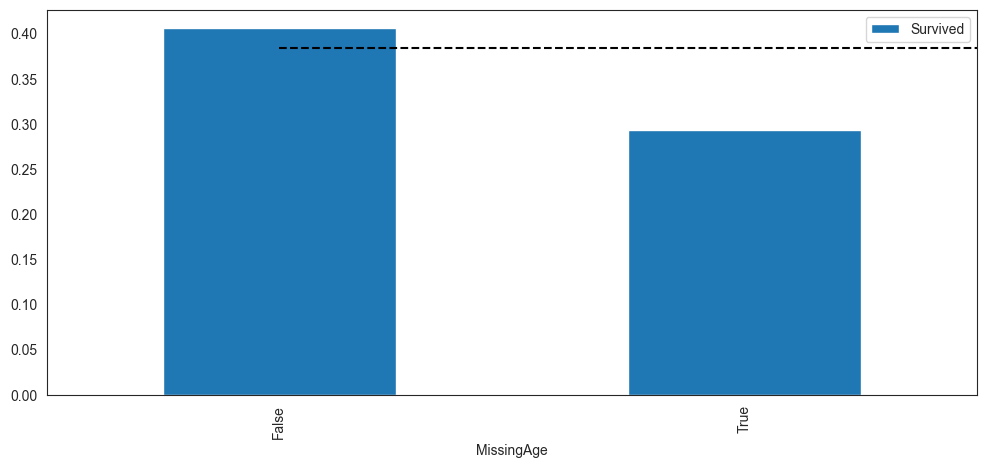

In [223]:
titanic.groupby("MissingAge").agg({'Survived':np.mean}).plot(kind='bar')
plt.hlines(titanic['Survived'].mean(),0,2,linestyles='--',colors='k')
plt.show()

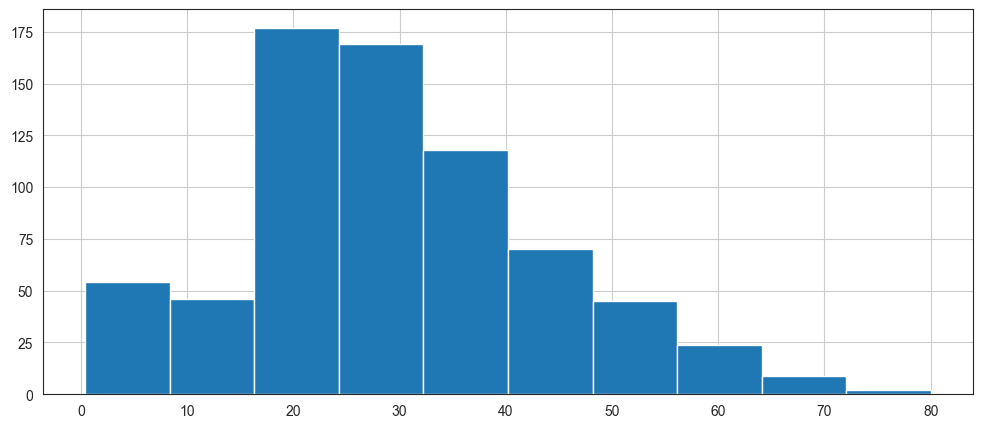

In [224]:
titanic['Age'].hist()
plt.show()

In [225]:
titanic['Age'] = titanic['Age'].fillna(-1)

In [226]:
titanic['Cabin'].value_counts(dropna=False)

Cabin
NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

In [228]:
titanic['Cabin'].nunique()

147

In [229]:
titanic['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [230]:
titanic['Missing_Cabin'] = pd.isnull(titanic['Cabin'])

<Axes: xlabel='Missing_Cabin'>

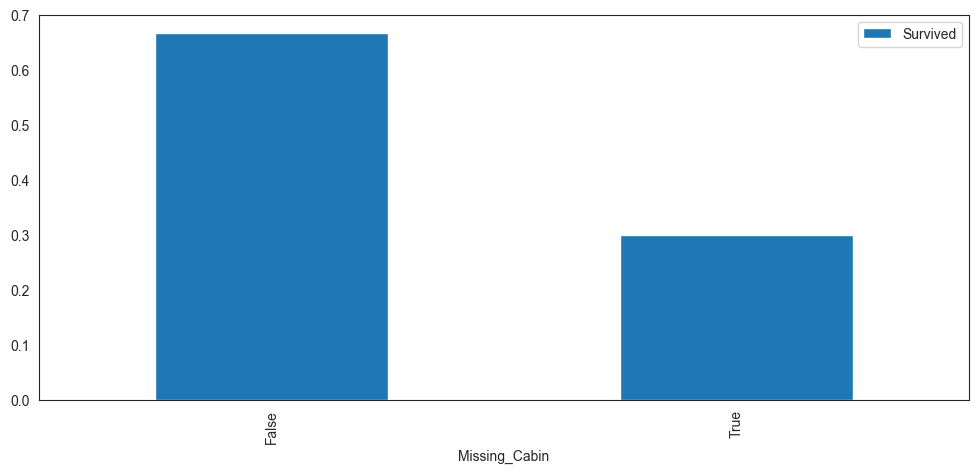

In [231]:
titanic.groupby('Missing_Cabin').agg({'Survived':np.mean}).plot(kind='bar')

In [232]:
mask_cabin =  titanic['Missing_Cabin'] == False

titanic.loc[mask_cabin,'Deck'] = titanic.loc[mask_cabin,'Cabin'].apply(lambda m : m[0])

In [233]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,MissingAge,Missing_Cabin,Deck
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,True,NaN
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,False,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,NaN
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,False,C
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,True,NaN


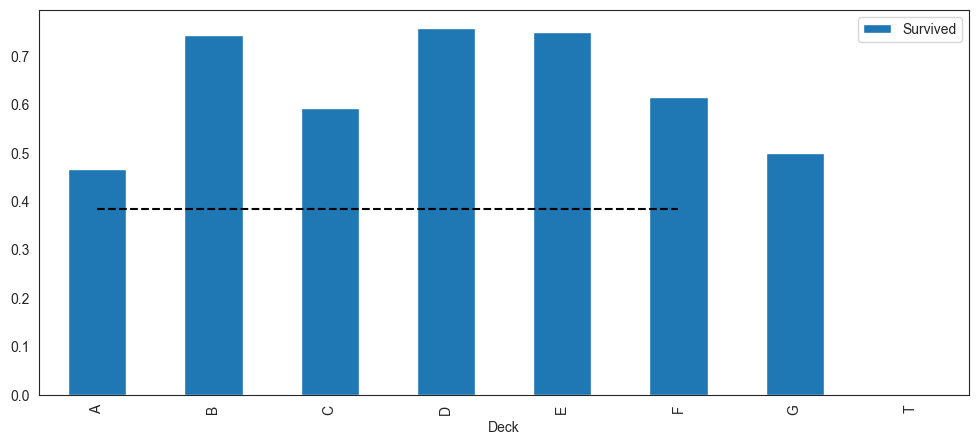

In [234]:
titanic.groupby('Deck').agg({'Survived':np.mean}).plot(kind='bar')
plt.hlines(titanic['Survived'].mean(),0,5,linestyles='--',colors='k')
plt.show()

In [237]:
titanic['Deck'].value_counts()

Deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

In [242]:
titanic['Deck'].replace('T',np.nan,inplace=True)

In [243]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [244]:
deck = OrdinalEncoder()
deck.fit(np.array(titanic['Deck']).reshape(-1,1))

OrdinalEncoder()

In [245]:
titanic['DeckNum'] = deck.transform(np.array(titanic['Deck']).reshape(-1,1))

In [247]:
titanic.pivot_table(index='DeckNum',columns='Deck',values='Survived',aggfunc=sum).fillna(0)

Deck,A,B,C,D,E,F,G
DeckNum,,,,,,,
0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,35.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0
6.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [248]:
titanic['DeckNum'].fillna(-1,inplace=True)

### Passenger Class

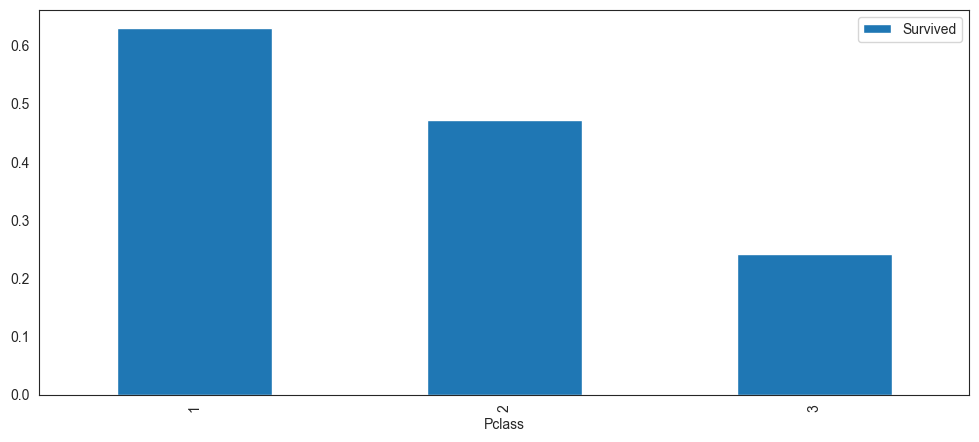

In [249]:
titanic.groupby('Pclass').agg({'Survived':np.mean}).plot(kind='bar')
plt.show()

### Gender

In [250]:
titanic['Sex'] = titanic['Sex'].map({'male':0,'female':1})

### Name

In [251]:
titanic['Name'].duplicated().sum()

0

In [252]:
titanic.drop('Name',axis=1,inplace=True)

### SibSp 
number of siblings/spouse

In [253]:
titanic['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [276]:
bins = np.arange(titanic['SibSp'].nunique()+3) - 0.5 

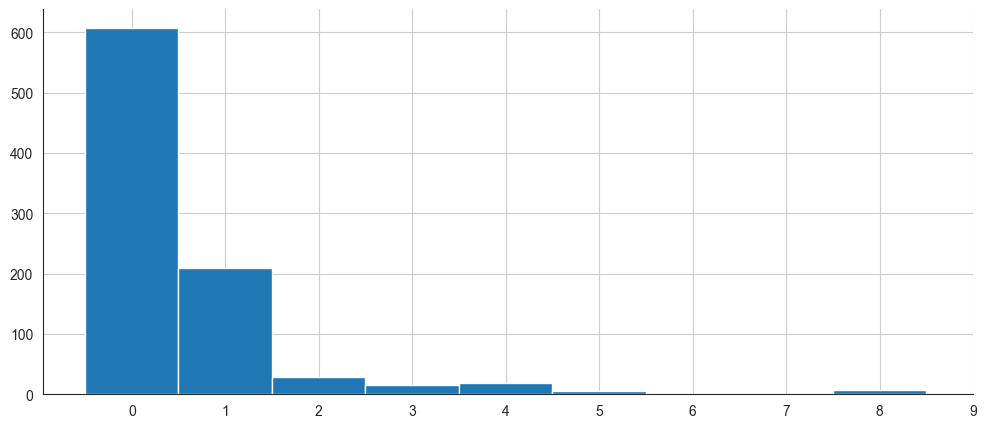

In [281]:
plt.figure
titanic['SibSp'].hist(bins=bins)
sns.despine()
plt.xticks(np.arange(0,10))
plt.show()

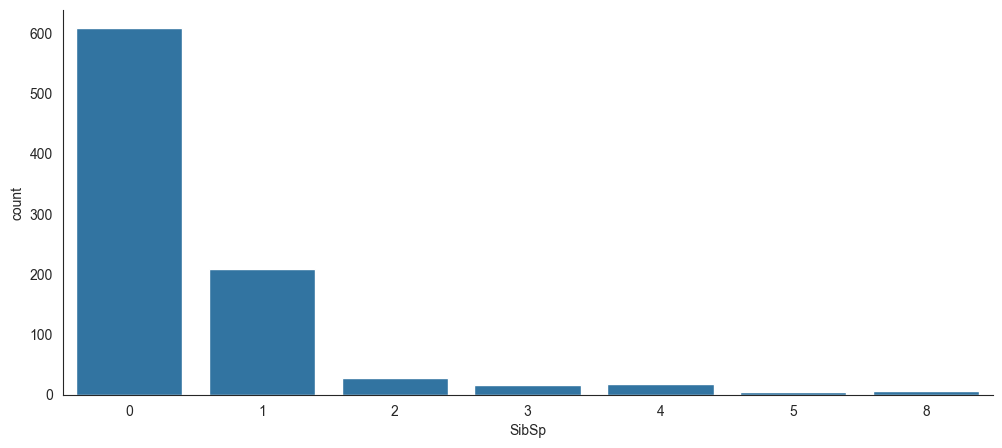

In [262]:
sns.countplot(x = 'SibSp', data=titanic)
sns.despine()
plt.show()

### Parents/Children Aboard

In [266]:
titanic.Parch.value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

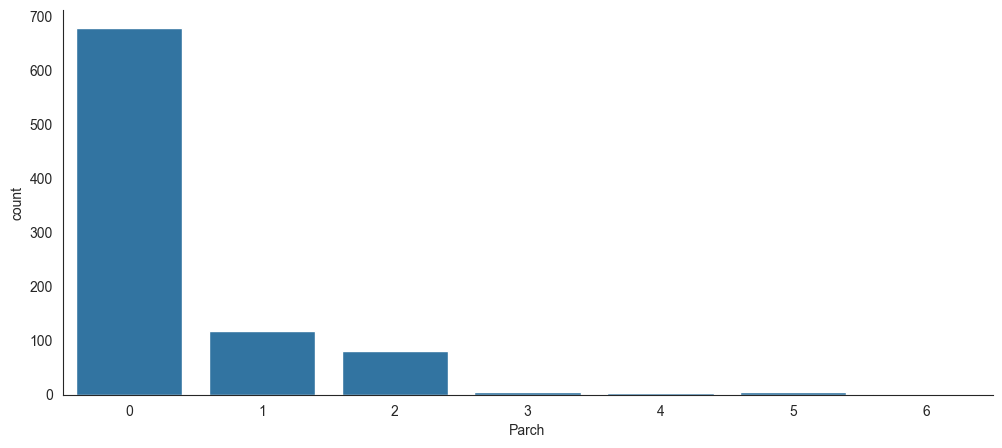

In [267]:
sns.countplot(x='Parch',data=titanic)
sns.despine()
plt.show()

### Ticket 

In [272]:
titanic['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [275]:
mask_ticket =  titanic['Ticket'] == 'CA 2144'
titanic.loc[mask_ticket,:]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,MissingAge,Missing_Cabin,Deck,DeckNum
PassengerId,,,,,,,,,,,,,,
60,0,3,0,11.0,5,2,CA 2144,46.9,NaN,S,False,True,NaN,-1.0
72,0,3,1,16.0,5,2,CA 2144,46.9,NaN,S,False,True,NaN,-1.0
387,0,3,0,1.0,5,2,CA 2144,46.9,NaN,S,False,True,NaN,-1.0
481,0,3,0,9.0,5,2,CA 2144,46.9,NaN,S,False,True,NaN,-1.0
679,0,3,1,43.0,1,6,CA 2144,46.9,NaN,S,False,True,NaN,-1.0
684,0,3,0,14.0,5,2,CA 2144,46.9,NaN,S,False,True,NaN,-1.0


In [312]:
ticket_capacity = titanic['Ticket'].value_counts()
ticket_capacity.name = 'members'
titanic =  titanic.merge(right=ticket_capacity,left_on='Ticket',right_index=True)

In [292]:
titanic.reset_index().duplicated().sum()

0

In [293]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,MissingAge,Missing_Cabin,Deck,DeckNum,members
PassengerId,,,,,,,,,,,,,,,
1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,False,True,NaN,-1.0,1
2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,False,False,C,2.0,1
3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,NaN,-1.0,1
4,1,1,1,35.0,1,0,113803,53.1000,C123,S,False,False,C,2.0,2
138,0,1,0,37.0,1,0,113803,53.1000,C123,S,False,False,C,2.0,2


In [294]:
titanic.pivot_table(index='members',columns='Pclass',values='Fare',aggfunc='sum')

Pclass,1,2,3
members,,,
1,3872.3291,1520.9541,2900.6287
2,6472.6252,1314.6500,1114.1459
3,4340.6250,598.7376,239.8749
4,3491.8332,NaN,526.2500
5,NaN,367.5000,145.6250
6,NaN,NaN,686.9250
7,NaN,NaN,1101.2456


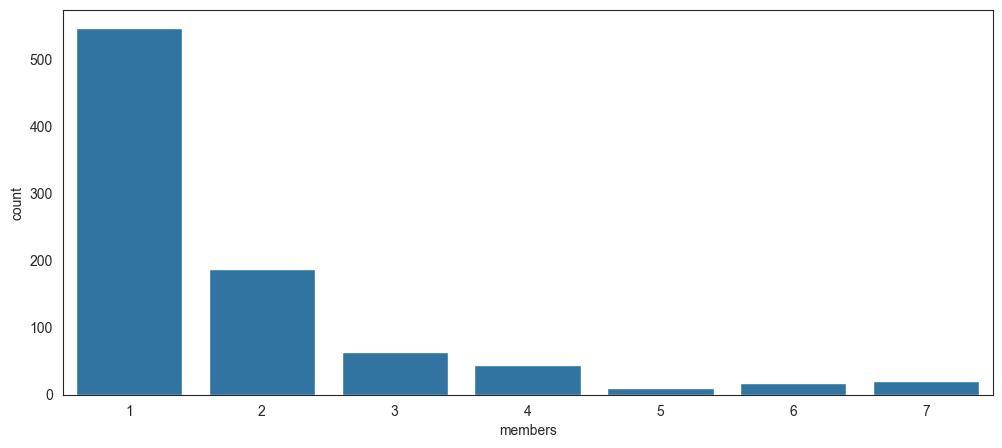

In [296]:
sns.countplot(x='members',data=titanic)
plt.show()

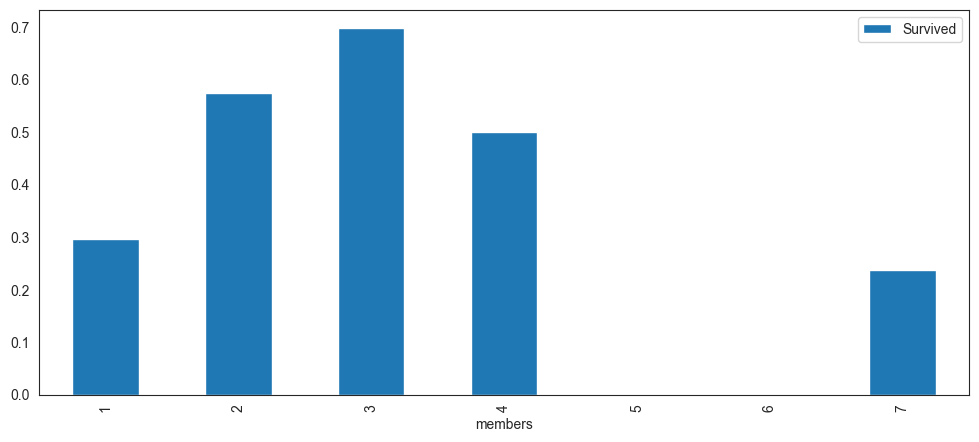

In [298]:
titanic.groupby('members').agg({'Survived':np.mean}).plot(kind='bar')
plt.show()

### fare

In [301]:
titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: >

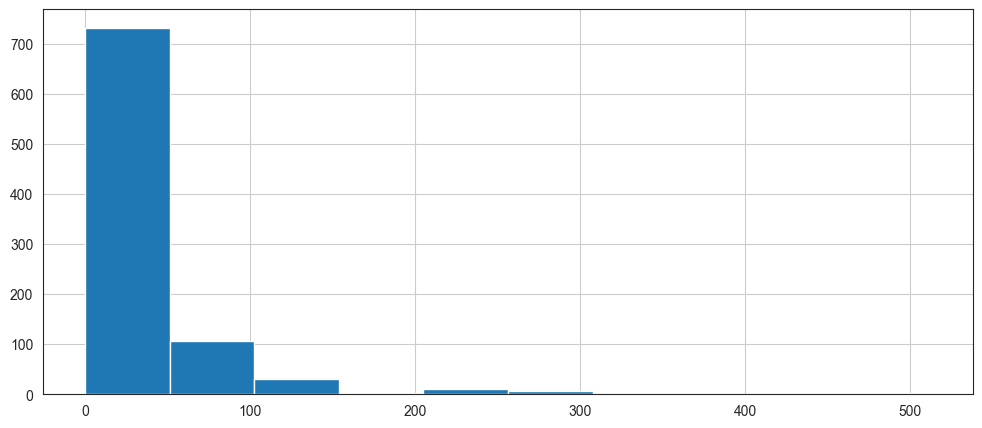

In [304]:
titanic['Fare'].hist()

In [305]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,MissingAge,Missing_Cabin,Deck,DeckNum,members
PassengerId,,,,,,,,,,,,,,,
1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,False,True,NaN,-1.0,1
2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,False,False,C,2.0,1
3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,NaN,-1.0,1
4,1,1,1,35.0,1,0,113803,53.1000,C123,S,False,False,C,2.0,2
138,0,1,0,37.0,1,0,113803,53.1000,C123,S,False,False,C,2.0,2


### Embarked

In [306]:
titanic['Embarked']

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked'>

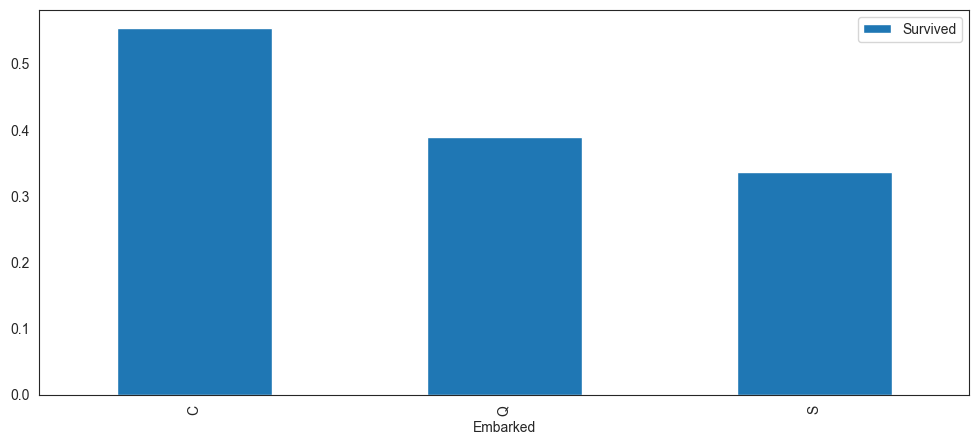

In [308]:
titanic.groupby('Embarked').agg({'Survived':np.mean}).plot(kind='bar')

In [309]:
titanic.groupby('Embarked').agg({'Survived':np.mean})

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [ ]:
titanic['Embarked'].map({'C':0,'Q':1,'S':'2'})

In [313]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Sex            891 non-null    int64  
 3   Age            891 non-null    float64
 4   SibSp          891 non-null    int64  
 5   Parch          891 non-null    int64  
 6   Ticket         891 non-null    object 
 7   Fare           891 non-null    float64
 8   Cabin          204 non-null    object 
 9   Embarked       889 non-null    object 
 10  MissingAge     891 non-null    bool   
 11  Missing_Cabin  891 non-null    bool   
 12  Deck           203 non-null    object 
 13  DeckNum        891 non-null    float64
 14  members_x      891 non-null    int64  
 15  members_y      891 non-null    int64  
dtypes: bool(2), float64(3), int64(7), object(4)
memory usage: 106.2+ KB


# Done...